In [15]:
# Dataset 1 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
# model 
from sklearn.cluster import KMeans
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine_quality_DT.csv', encoding='latin-1')
df = pd.read_csv(a)
#df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

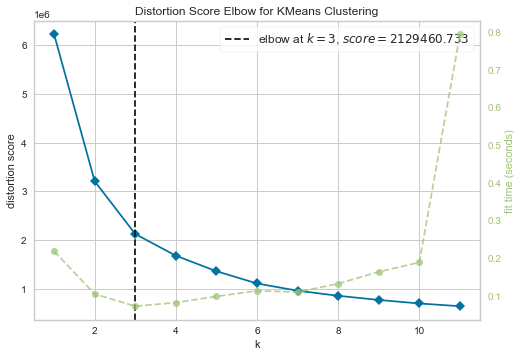

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Using the elbow method to find the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [10]:
# Visualising the clusters in with infinite features

import plotly.express as px

a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
#df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)

df['label']=kmeans.labels_
polar=df.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

In [11]:
# Loop for different number of clusters

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)
kmeans.fit(df_scaled)

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(2,10)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')





 Number of Clusters: 2 | silhouette_score_average : 0.4686206077013245
 Number of Clusters: 3 | silhouette_score_average : 0.3461342929292447
 Number of Clusters: 4 | silhouette_score_average : 0.27904088024256457
 Number of Clusters: 5 | silhouette_score_average : 0.2787359613143485
 Number of Clusters: 6 | silhouette_score_average : 0.22289182694053838
 Number of Clusters: 7 | silhouette_score_average : 0.18553809241762698
 Number of Clusters: 8 | silhouette_score_average : 0.18749148367959564
 Number of Clusters: 9 | silhouette_score_average : 0.1850240015639386
 Number of Clusters: 3 | Number of Negative Values: 17
 Number of Clusters: 4 | Number of Negative Values: 226
 Number of Clusters: 5 | Number of Negative Values: 78
 Number of Clusters: 6 | Number of Negative Values: 165
 Number of Clusters: 7 | Number of Negative Values: 144
 Number of Clusters: 8 | Number of Negative Values: 191
 Number of Clusters: 9 | Number of Negative Values: 283


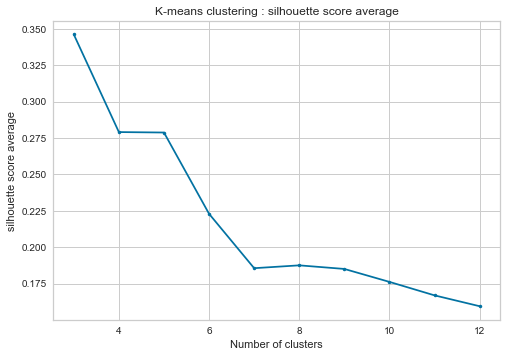

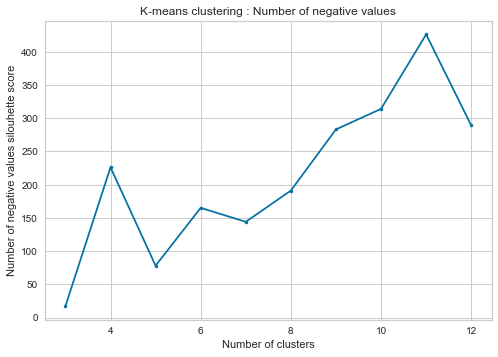

In [12]:
# Loop for different number of clusters

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)
kmeans.fit(df_scaled)

# re-do our loop, try to find values with no negative scores, or one with the least!!
negative_values = [0 for i in range(3,13)]

silhouette_score_average_list = []

# remember, anything past 15 looked really good based on the inertia
number_of_clusters = [i for i in range(3,13)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for i in number_of_clusters:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    silhouette_score_average_list.append(silhouette_score_average)
    
    # iterate through to find any negative values
    for k in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if k < 0:
            negative_values[i-3] += 1


fig1, ax1 = plt.subplots()
ax1.set_title('K-means clustering : silhouette score average')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('silhouette score average')
ax1.plot(number_of_clusters, silhouette_score_average_list, marker=".")

fig, ax = plt.subplots()
ax.set_title('K-means clustering : Number of negative values')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("Number of negative values silouhette score")
ax.plot(number_of_clusters, negative_values, marker=".")

plt.show()




time for running the algorithm = 8.857125341994106 s


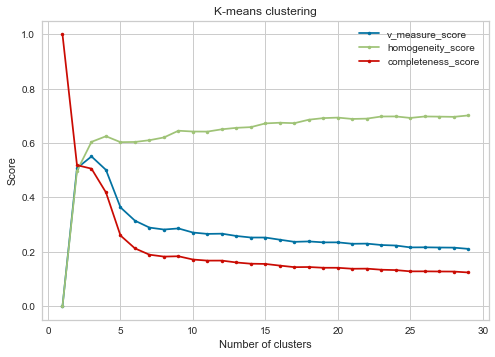

In [17]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score

v_measure_score_list = []
homogeneity_score_list = []
completeness_score_list = []

time1 = time.perf_counter()

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    y_pred1 = kmeans.fit_predict(X)

    v_measure_score_list.append(v_measure_score(y,y_pred1,beta =1.0))
    homogeneity_score_list.append(homogeneity_score(y,y_pred1))
    completeness_score_list.append(completeness_score(y,y_pred1))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')
    
number_of_clusters = [i for i in range(1,30)]
fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.plot(number_of_clusters, v_measure_score_list, marker=".", label="v_measure_score")
ax.plot(number_of_clusters, homogeneity_score_list, marker=".", label="homogeneity_score")
ax.plot(number_of_clusters, completeness_score_list, marker=".", label="completeness_score")
ax.legend()
plt.show()